In [1]:
# This code is written to support the experiments in the book titled:
# "Adaptive Machine Learning Algorithms with Python"
# by
# Chanchal Chatterjee
# December 2021
#
# Experiments for Chapter 8 (elec.csv Data)
# Drift detection
# EVD on non-stationary data
#
# Author: Chanchal Chatterjee
#

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [3]:
# Data obtained from USP DS Repository https://sites.google.com/view/uspdsrepository
# get data here: https://sites.google.com/view/uspdsrepository
dataset   = pd.read_csv("../Data/elec.csv")
dataset = dataset.dropna()
print(dataset.shape)
print(dataset.head())


(45312, 9)
    F1  F2        F3        F4        F5        F6        F7        F8  Class
0  0.0   2  0.000000  0.056443  0.439155  0.003467  0.422915  0.414912      1
1  0.0   2  0.021277  0.051699  0.415055  0.003467  0.422915  0.414912      1
2  0.0   2  0.042553  0.051489  0.385004  0.003467  0.422915  0.414912      1
3  0.0   2  0.063830  0.045485  0.314639  0.003467  0.422915  0.414912      1
4  0.0   2  0.085106  0.042482  0.251116  0.003467  0.422915  0.414912      0


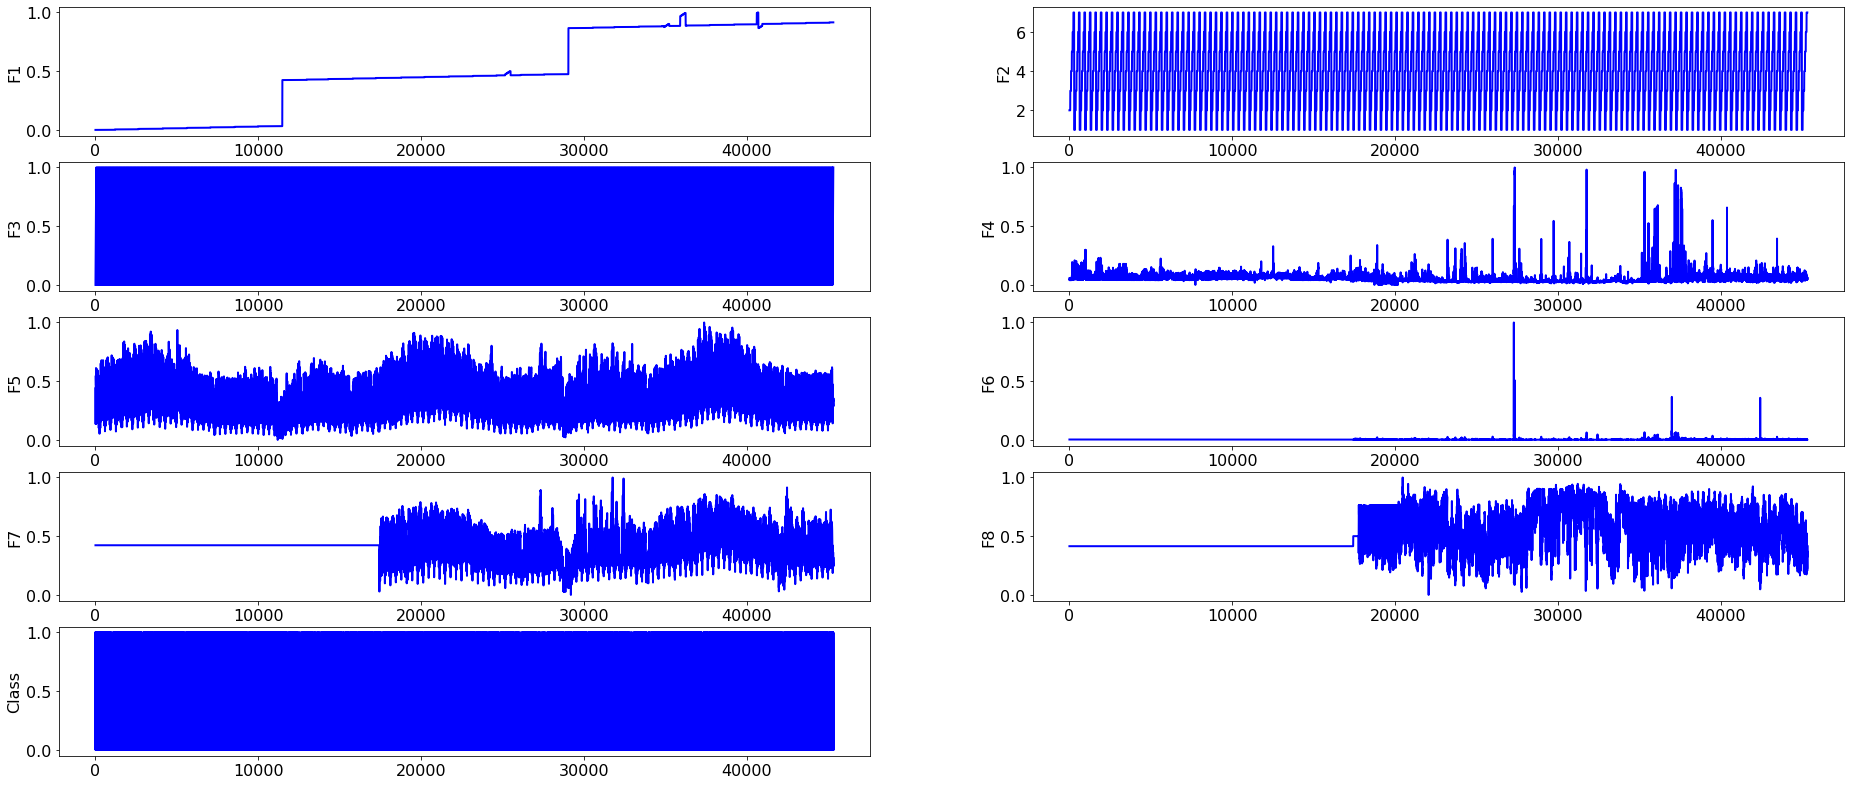

In [4]:
plt.figure(figsize=(32, 48))
plt.rcParams.update({'font.size': 16})
cols = dataset.columns
for i in range(dataset.shape[1]):
    plt.subplot(17, 2, i+1)
    plt.ylabel(cols[i])
    plt.plot(dataset[cols[i]], lw=2, color='b')
plt.show()

------------------------------------------
## Adaptive Linear Eigen Decomposition
### Using Non-Stationary Components Only

In [5]:
dataset1 = dataset.drop('Class', 1) #.iloc[0:10000]
print(dataset1.shape)
print(dataset1.head())


(45312, 8)
    F1  F2        F3        F4        F5        F6        F7        F8
0  0.0   2  0.000000  0.056443  0.439155  0.003467  0.422915  0.414912
1  0.0   2  0.021277  0.051699  0.415055  0.003467  0.422915  0.414912
2  0.0   2  0.042553  0.051489  0.385004  0.003467  0.422915  0.414912
3  0.0   2  0.063830  0.045485  0.314639  0.003467  0.422915  0.414912
4  0.0   2  0.085106  0.042482  0.251116  0.003467  0.422915  0.414912


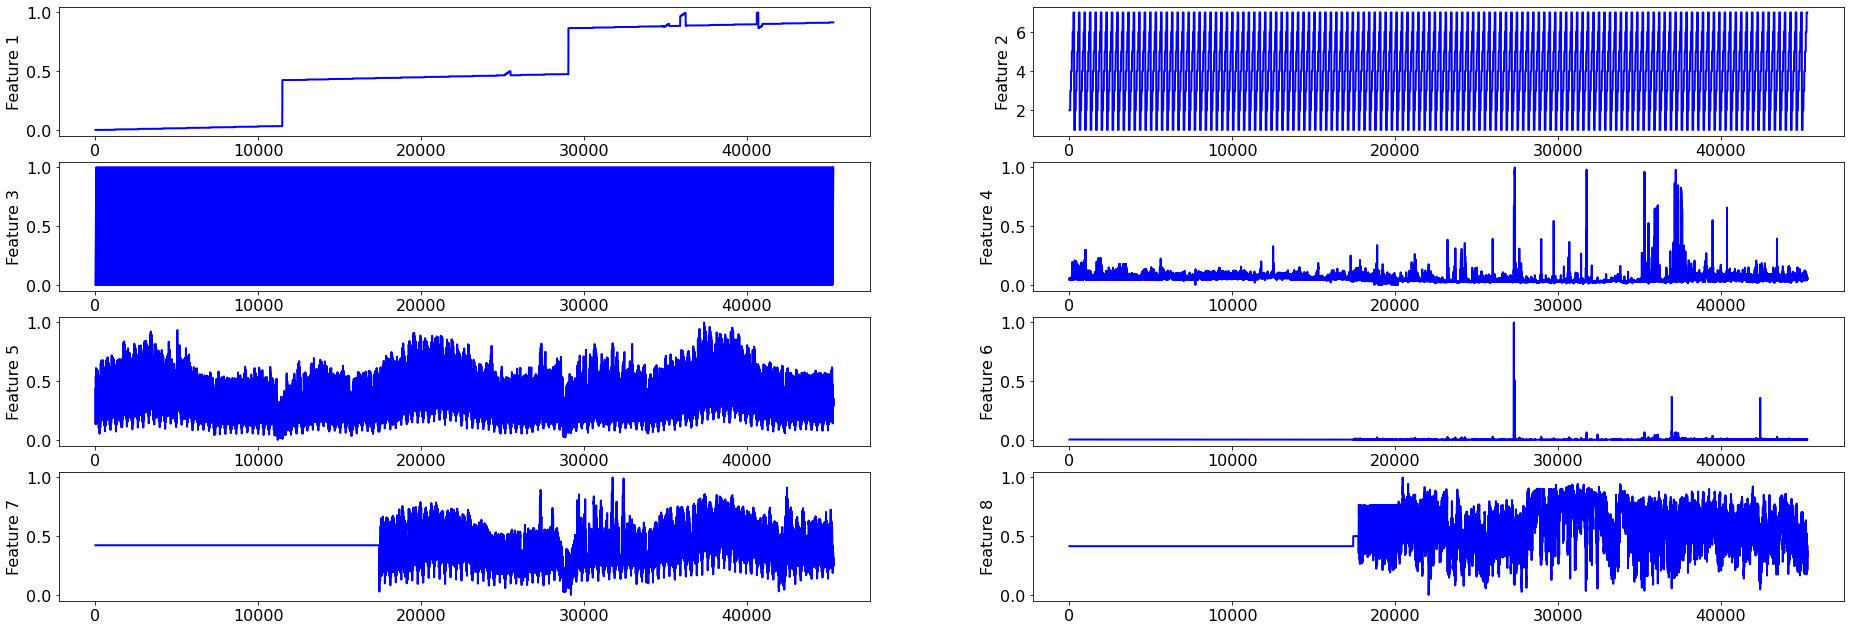

In [6]:
plt.figure(figsize=(32, 48))
plt.rcParams.update({'font.size': 16})
cols = dataset1.columns
for i in range(dataset1.shape[1]):
    plt.subplot(17, 2, i+1)
    plt.ylabel('Feature {}'.format(i+1))
    plt.plot(dataset1[cols[i]], lw=2, color='b')
plt.show()


In [7]:
# Adaptive algorithm
from numpy import linalg as la

nSamples = dataset1.shape[0]
nDim = dataset1.shape[1]

A = np.zeros(shape=(nDim,nDim)) # stores adaptive correlation matrix
N = np.zeros(shape=(1,nDim)) # stores eigen norms
W = 0.1 * np.ones(shape=(nDim,nDim)) # stores adaptive eigenvectors
for iter in range(nSamples):
    cnt = iter + 1
    # Update data correlation matrix A with current data vector x
    x = np.array(dataset1.iloc[iter])
    x = x.reshape(nDim,1)
    A = A + (1.0/cnt)*((np.dot(x, x.T)) - A)
    etat = 1.0/(25 + cnt)
    # Deflated Gradient Descent
    W = W + etat*(A @ W - 0.5*W @ np.triu(W.T @ A @ W) - 0.5*A @ W @ np.triu(W.T @ W))
    newnorm = la.norm(W, axis=0)
    N = np.vstack([N, newnorm])
print("W=\n", W)


W=
 [[ 9.09509617e-02  1.61259180e-02  2.48283004e-02  3.26170882e-02
   3.89463934e-02  4.40562529e-02  4.81393305e-02  5.13250371e-02]
 [ 9.78822958e-01  5.49413870e-02 -6.81409171e-04 -2.45442055e-02
  -3.65634432e-02 -4.08759931e-02 -4.08044919e-02 -3.92067658e-02]
 [ 9.94115791e-02  2.71268607e-02  5.51041780e-02  7.88712334e-02
   9.76600380e-02  1.12189302e-01  1.23283872e-01  1.31636958e-01]
 [ 1.13349276e-02  1.00113679e-02  2.09724069e-02  2.90772354e-02
   3.52196608e-02  3.98838255e-02  4.34540973e-02  4.62265141e-02]
 [ 8.33475906e-02  2.46734394e-02  4.68852186e-02  6.50655376e-02
   7.91585774e-02  8.98707328e-02  9.78995388e-02  1.03807323e-01]
 [ 6.70608773e-04  7.62676992e-03  1.68816356e-02  2.35207959e-02
   2.85159018e-02  3.23082489e-02  3.52347309e-02  3.75525593e-02]
 [ 8.42427962e-02  2.06837918e-02  3.53469612e-02  4.76305939e-02
   5.73056507e-02  6.48040977e-02  7.05374781e-02  7.48291353e-02]
 [ 9.78687004e-02  2.17284090e-02  3.59703759e-02  4.81679614e-02

In [8]:
import math
from scipy.linalg import eigh
WTW = W.T @ W
WTAW = W.T @ A @ W
#print("WTW=\n", WTW)
#print("WTAW=\n", WTAW)
eigvals, eigvecs = eigh(A)
#print("PHI=\n", eigvecs)
print("Lambda=\n", eigvals)
print("Diags of WTAW")
print([WTAW[i,i] for i in range(len(WTAW[0]))])
print("Diags of WTW")
print([WTW[i,i] for i in range(len(WTW[0]))])


Lambda=
 [9.48120265e-05 1.38086888e-03 6.05257508e-03 3.20845171e-02
 3.68989011e-02 1.08937906e-01 2.95364743e-01 2.09213368e+01]
Diags of WTAW
[20.91980667762231, 0.0863294591030318, 0.00896426716709633, 0.004611975565577644, 0.007324686566544162, 0.00933700516108371, 0.010583454395739985, 0.012015891710853467]
Diags of WTW
[1.0000000044759325, 0.00568158452735857, 0.009119710062597361, 0.01810802753093244, 0.027341682943877437, 0.03538807096486647, 0.0419445741632731, 0.047136449492791756]


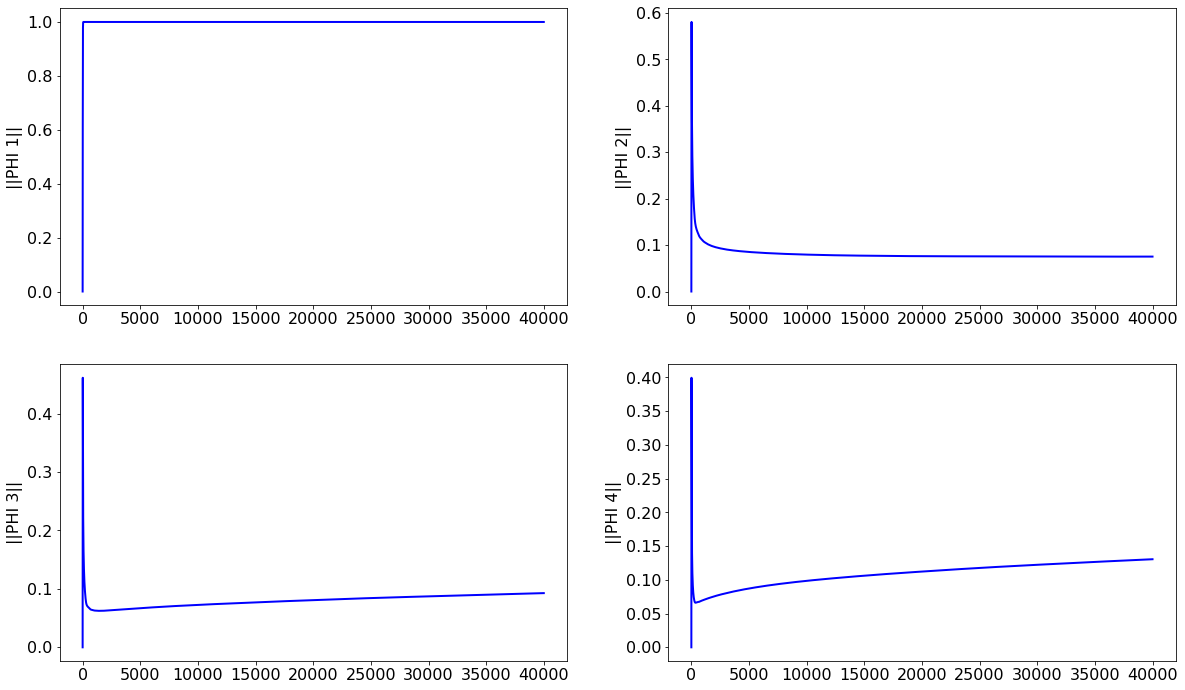

In [12]:
cols = dataset.columns
norms = pd.DataFrame({cols[0]: N[:, 0], cols[1]: N[:, 1], cols[2]: N[:, 2], cols[3]: N[:, 3], \
                      cols[4]: N[:, 4], cols[5]: N[:, 5], cols[6]: N[:, 6], cols[7]: N[:, 7]})

plt.figure(figsize=(20, 12))
plt.rcParams.update({'font.size': 16})
cols = norms.columns
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.ylabel('||PHI {}||'.format(i+1))
    plt.plot(norms[cols[i]][0:40000], lw=2, color='b')
plt.show()

Text(0.5, 0, 'Samples')

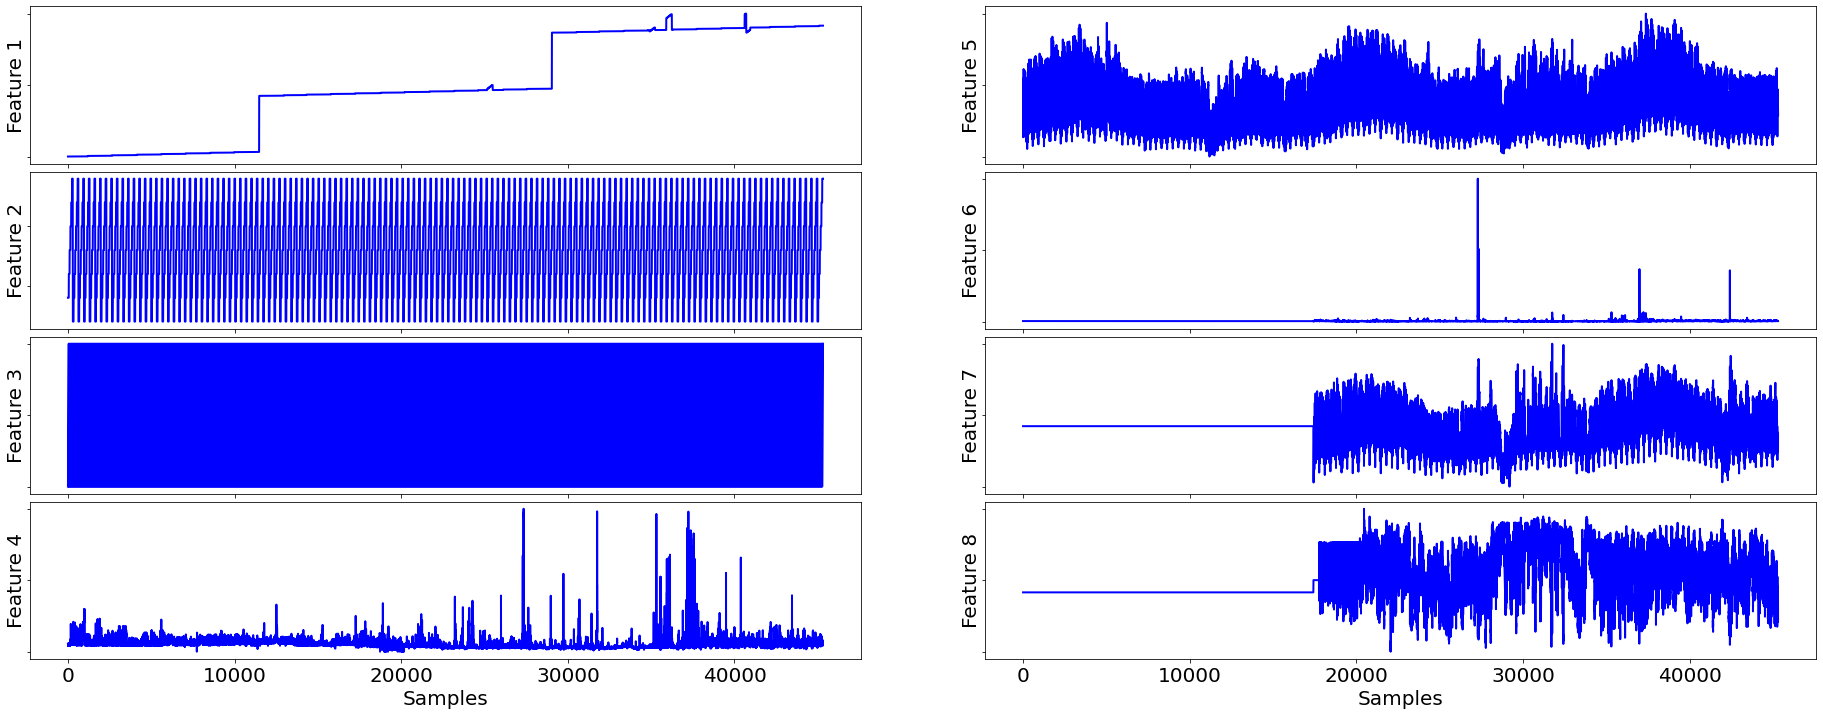

In [14]:
# Plot Figure 8.6
fig = plt.figure(figsize=(32, 12))
plt.rcParams.update({'font.size': 20})
cols = dataset.columns

grid = plt.GridSpec(4, 2, wspace=0.15, hspace=0.05)

ax1 = fig.add_subplot(grid[0, 0])
plt.ylabel('Feature 1')
plt.plot(dataset[cols[0]], lw=2, color='b')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), visible=False)

ax2 = fig.add_subplot(grid[1, 0], sharex=ax1)
plt.ylabel('Feature 2')
plt.plot(dataset[cols[1]], lw=2, color='b')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)

ax3 = fig.add_subplot(grid[2, 0], sharex=ax1)
plt.ylabel('Feature 3')
plt.plot(dataset[cols[2]], lw=2, color='b')
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)

ax4 = fig.add_subplot(grid[3, 0], sharex=ax1)
plt.ylabel('Feature 4')
plt.plot(dataset[cols[3]], lw=2, color='b')
plt.setp(ax4.get_xticklabels(), visible=True)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.xlabel('Samples')

ax6 = fig.add_subplot(grid[0, 1], sharex=ax1)
plt.ylabel('Feature 5')
plt.plot(dataset[cols[4]], lw=2, color='b')
plt.setp(ax6.get_xticklabels(), visible=False)
plt.setp(ax6.get_yticklabels(), visible=False)

ax7 = fig.add_subplot(grid[1, 1], sharex=ax1)
plt.ylabel('Feature 6')
plt.plot(dataset[cols[5]], lw=2, color='b')
plt.setp(ax7.get_xticklabels(), visible=False)
plt.setp(ax7.get_yticklabels(), visible=False)

ax8 = fig.add_subplot(grid[2, 1], sharex=ax1)
plt.ylabel('Feature 7')
plt.plot(dataset[cols[6]], lw=2, color='b')
plt.setp(ax8.get_xticklabels(), visible=False)
plt.setp(ax8.get_yticklabels(), visible=False)

ax9 = fig.add_subplot(grid[3, 1], sharex=ax1)
plt.ylabel('Feature 8')
plt.plot(dataset[cols[7]], lw=2, color='b')
plt.setp(ax9.get_xticklabels(), visible=True)
plt.setp(ax9.get_yticklabels(), visible=False)
plt.xlabel('Samples')
